## STOCK PRICE PREDICTION - ITCS

Data Set Link: https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=ITC.csv


In [2]:
## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import warnings
warnings.filterwarnings("ignore")

In [4]:
## Reading CSV 

In [5]:
dfo=pd.read_csv("ITC.csv")

In [6]:
dfo


Date Symbol Series  Prev Close    Open    High     Low    Last  \
0     2000-01-03    ITC     EQ      656.00  694.00  708.50  675.00  708.50   
1     2000-01-04    ITC     EQ      708.50  714.00  729.00  694.30  710.65   
2     2000-01-05    ITC     EQ      712.35  716.25  758.90  660.00  731.00   
3     2000-01-06    ITC     EQ      726.20  741.00  784.30  741.00  784.30   
4     2000-01-07    ITC     EQ      784.30  832.40  847.05  824.00  847.05   
...          ...    ...    ...         ...     ...     ...     ...     ...   
5136  2020-08-25    ITC     EQ      196.70  197.25  198.30  195.10  195.70   
5137  2020-08-26    ITC     EQ      195.40  196.50  196.55  193.65  195.00   
5138  2020-08-27    ITC     EQ      194.95  198.50  198.90  193.90  194.35   
5139  2020-08-28    ITC     EQ      194.25  194.60  196.30  194.05  195.85   
5140  2020-08-31    ITC     EQ      195.55  199.00  199.00  190.00  190.90   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0     708.50  701.81    562715  3.949174e+13       NaN                 NaN   
1     712.35  714.16    712637  5.089379e+13       NaN                 NaN   
2     726.20  732.43   1382149  1.012325e+14       NaN                 NaN   
3     784.30  776.63    721618  5.604266e+13       NaN                 NaN   
4     847.05  841.25    231209  1.945046e+13       NaN                 NaN   
...      ...     ...       ...           ...       ...                 ...   
5136  195.40  196.12  15199285  2.980916e+14  111302.0           6998790.0   
5137  194.95  194.67  22631585  4.405660e+14  127742.0          11644882.0   
5138  194.25  195.15  47213462  9.213831e+14  274421.0          25089620.0   
5139  195.55  194.92  34645794  6.753092e+14  221449.0          19959485.0   
5140  191.10  192.67  96998374  1.868848e+15  308091.0          59695707.0   

      %Deliverble  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
5136       0.4605  
5137       0.5145  
5138       0.5314  
5139       0.5761  
5140       0.6154  

[5141 rows x 15 columns]

In [7]:
df=dfo

<AxesSubplot:>

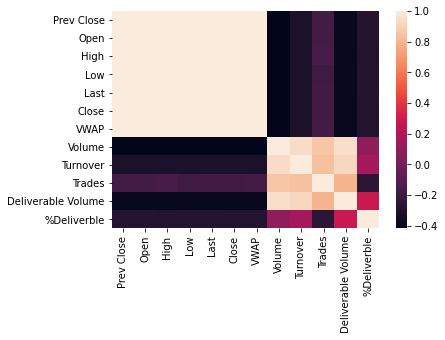

In [8]:
sns.heatmap(dfo.corr())

In [9]:
## seting Date as index

In [10]:
df=df.set_index(['Date'])

In [11]:
##plotting Close and date

<AxesSubplot:xlabel='Date'>

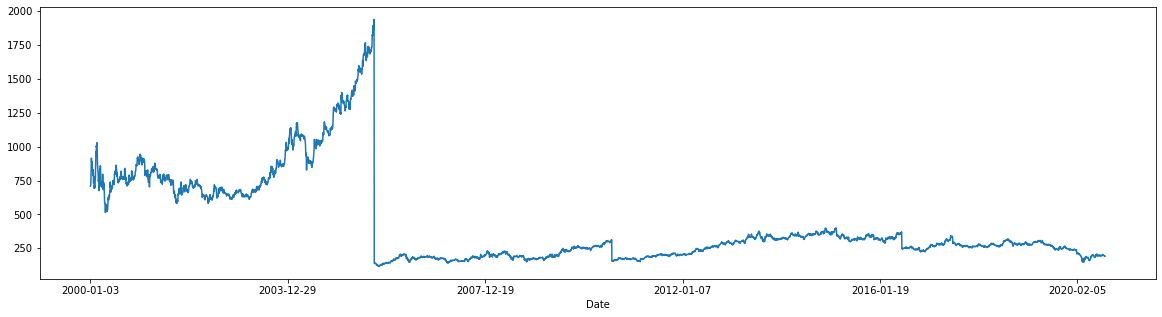

In [12]:
df['Close'].plot(figsize=(20,5))


In [13]:
## plotting Opening price ,Closing price VWAP price

<AxesSubplot:title={'center':'Opening ,Closing ,low ,High and VWAP of ITC Stock'}, xlabel='Date'>

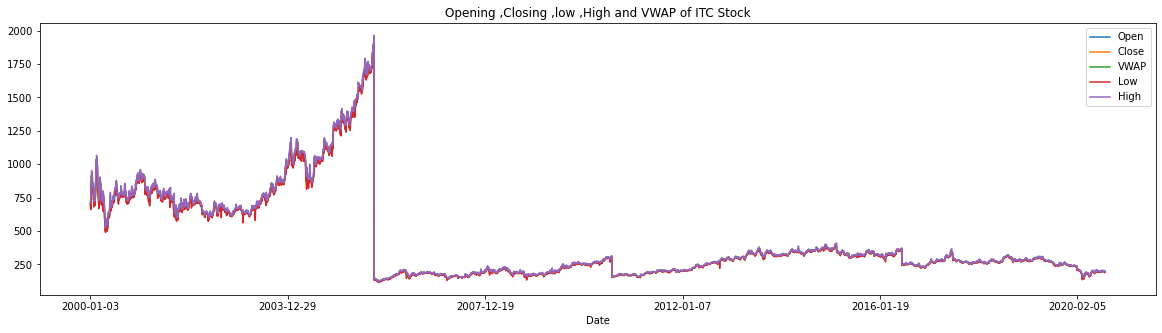

In [14]:
df[['Open','Close','VWAP','Low','High']].plot(figsize=(20,5),title="Opening ,Closing ,low ,High and VWAP of ITC Stock")

In [15]:
## creating array of Closing price from pandas series

In [16]:
dfc=df.reset_index()['Close']

In [17]:
##reshaping

In [18]:
dfc=np.array(dfc).reshape(-1,1)

In [19]:
dfc

array([[708.5 ],
       [712.35],
       [726.2 ],
       ...,
       [194.25],
       [195.55],
       [191.1 ]])

In [20]:
## Scaling all the prices

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
dfc=scaler.fit_transform(dfc)

In [22]:
dfc

array([[0.32502124],
       [0.32713123],
       [0.33472173],
       ...,
       [0.04318636],
       [0.04389883],
       [0.04146001]])

In [23]:
## craeting traing and testing dataset 

In [24]:
training_size=int(len(dfc)*0.75)
test_size=len(dfc)-training_size
train_data,test_data=dfc[0:training_size,:],dfc[training_size:len(dfc),:1]

In [25]:
x_train=[]
y_train = []
npo=10 # no of previous output
for i in range(npo,len(train_data)):
    x_train.append(train_data[i-npo:i,0])
    
    y_train.append(train_data[i,0])

In [26]:
x_test=[]
y_test =[]
npo=10 # no of previous output
for i in range(npo,len(test_data)):
    x_test.append(test_data[i-npo:i,0])
    y_test.append(test_data[i,0])


In [27]:
x_train,y_train=np.array(x_train),np.array(y_train)



In [28]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))



In [29]:
##creating model

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [31]:
##trainging model

In [32]:
model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.0098
Epoch 2/100
61/61 - 1s - loss: 0.0017
Epoch 3/100
61/61 - 1s - loss: 0.0016
Epoch 4/100
61/61 - 1s - loss: 0.0016
Epoch 5/100
61/61 - 1s - loss: 0.0015
Epoch 6/100
61/61 - 1s - loss: 0.0015
Epoch 7/100
61/61 - 1s - loss: 0.0014
Epoch 8/100
61/61 - 1s - loss: 0.0015
Epoch 9/100
61/61 - 1s - loss: 0.0013
Epoch 10/100
61/61 - 1s - loss: 0.0013
Epoch 11/100
61/61 - 1s - loss: 0.0014
Epoch 12/100
61/61 - 1s - loss: 0.0012
Epoch 13/100
61/61 - 1s - loss: 9.2091e-04
Epoch 14/100
61/61 - 1s - loss: 9.2017e-04
Epoch 15/100
61/61 - 1s - loss: 8.0768e-04
Epoch 16/100
61/61 - 1s - loss: 7.2609e-04
Epoch 17/100
61/61 - 1s - loss: 8.5117e-04
Epoch 18/100
61/61 - 1s - loss: 6.4942e-04
Epoch 19/100
61/61 - 1s - loss: 5.7103e-04
Epoch 20/100
61/61 - 1s - loss: 5.9853e-04
Epoch 21/100
61/61 - 1s - loss: 5.7532e-04
Epoch 22/100
61/61 - 1s - loss: 5.4434e-04
Epoch 23/100
61/61 - 1s - loss: 5.5150e-04
Epoch 24/100
61/61 - 1s - loss: 5.1944e-04
Epoch 25/100
61/61 - 1s -

In [33]:
x_test,y_test=np.array(x_test),np.array(y_test)


In [34]:
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))


In [35]:
##predicting results from test dataset

In [36]:

test_predict=model.predict(x_test)

In [37]:
##Scaling back

In [38]:

test_predict=scaler.inverse_transform(test_predict)

In [39]:
test_predict

array([[315.793  ],
       [316.68356],
       [318.30096],
       ...,
       [196.22389],
       [195.575  ],
       [195.55086]], dtype=float32)

In [40]:
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
y_test

array([[315.6 ],
       [318.4 ],
       [317.35],
       ...,
       [194.25],
       [195.55],
       [191.1 ]])

In [41]:
##calculating RMSE

In [42]:
math.sqrt(mean_squared_error(y_test,test_predict))

6.796899243883107

In [43]:
dfc=scaler.inverse_transform(dfc)

In [44]:
#creating traindata of length dataset with trainging data

In [45]:
traindata= np.empty_like(dfc)
traindata[:, :] = np.nan

In [46]:
traindata[npo:training_size, :] = dfc[npo:training_size, :]


In [47]:
##creating testPredict of length dataset with test data

In [80]:
testPredict= np.empty_like(df)
testPredict[:, :] = np.nan
testPredict[training_size+(npo):len(dfc),:] = test_predict


In [49]:
##plotting Actual Closing price , trained price and predicted price

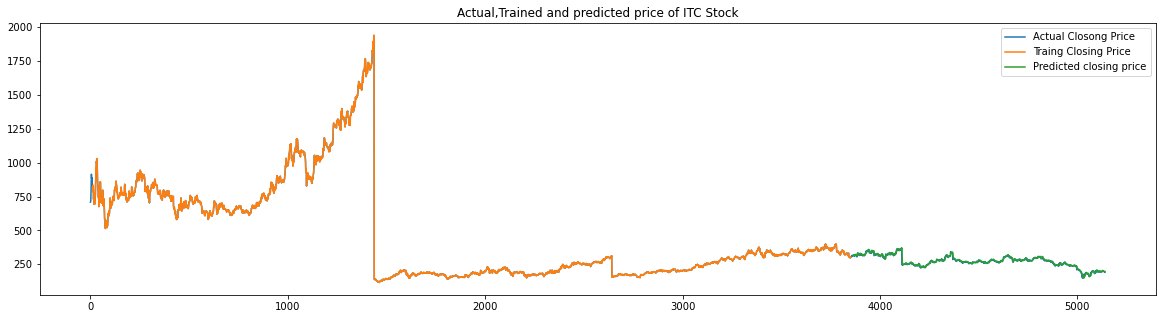

In [81]:
plt.figure(figsize=(20,5))
plt.plot(dfc,label="Actual Closong Price")
plt.plot(traindata,label="Traing Closing Price")
plt.plot(testPredict,label="Predicted closing price")
plt.title("Actual,Trained and predicted price of ITC Stock")
plt.legend()


In [ ]:
## creating dataframe with Closing price and predicted price

In [52]:
df= df.filter(['Close'])


In [53]:
table = df[training_size+npo:]
table.shape
table['Predictions'] = test_predict
table

Close  Predictions
Date                           
2015-07-03  315.60   315.792999
2015-07-06  318.40   316.683563
2015-07-07  317.35   318.300964
2015-07-08  312.95   319.000946
2015-07-09  310.60   317.414062
...            ...          ...
2020-08-25  195.40   197.317413
2020-08-26  194.95   196.814865
2020-08-27  194.25   196.223892
2020-08-28  195.55   195.574997
2020-08-31  191.10   195.550858

[1276 rows x 2 columns]

In [54]:
##Ploting Actual Closing price and predicted Closing price

<AxesSubplot:title={'center':'Closing and Actual price of ITC Stock'}, xlabel='Date'>

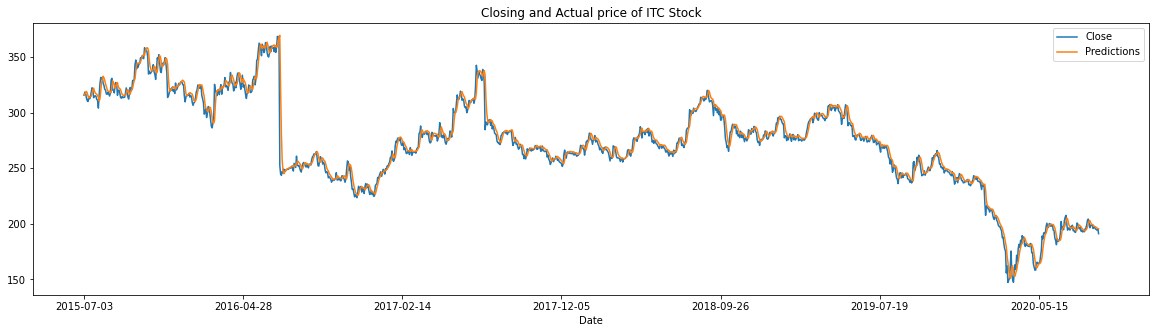

In [55]:
table[['Close','Predictions']].plot(figsize=(20,5),title="Closing and Actual price of ITC Stock")

# Stock price prediction on last two year of data

## using same method as above








In [56]:
df1=dfo[dfo['Date']>"2018-09-31"]  
df1

Date Symbol Series  Prev Close    Open    High     Low    Last  \
4668  2018-10-01    ITC     EQ      297.75  300.85  302.95  293.40  297.00   
4669  2018-10-03    ITC     EQ      297.10  297.00  300.00  294.65  295.25   
4670  2018-10-04    ITC     EQ      295.20  293.85  295.70  285.15  287.75   
4671  2018-10-05    ITC     EQ      287.10  285.50  286.00  275.10  276.05   
4672  2018-10-08    ITC     EQ      276.50  279.00  279.40  269.15  273.50   
...          ...    ...    ...         ...     ...     ...     ...     ...   
5136  2020-08-25    ITC     EQ      196.70  197.25  198.30  195.10  195.70   
5137  2020-08-26    ITC     EQ      195.40  196.50  196.55  193.65  195.00   
5138  2020-08-27    ITC     EQ      194.95  198.50  198.90  193.90  194.35   
5139  2020-08-28    ITC     EQ      194.25  194.60  196.30  194.05  195.85   
5140  2020-08-31    ITC     EQ      195.55  199.00  199.00  190.00  190.90   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
4668  297.10  296.68   9025533  2.677655e+14   95424.0           4657058.0   
4669  295.20  297.16   7570160  2.249519e+14   80374.0           4455682.0   
4670  287.10  290.28   8105763  2.352975e+14  110051.0           3904487.0   
4671  276.50  280.41  17622969  4.941680e+14  156108.0          11659870.0   
4672  273.20  273.60  16430487  4.495398e+14  171056.0          10520337.0   
...      ...     ...       ...           ...       ...                 ...   
5136  195.40  196.12  15199285  2.980916e+14  111302.0           6998790.0   
5137  194.95  194.67  22631585  4.405660e+14  127742.0          11644882.0   
5138  194.25  195.15  47213462  9.213831e+14  274421.0          25089620.0   
5139  195.55  194.92  34645794  6.753092e+14  221449.0          19959485.0   
5140  191.10  192.67  96998374  1.868848e+15  308091.0          59695707.0   

      %Deliverble  
4668       0.5160  
4669       0.5886  
4670       0.4817  
4671       0.6616  
4672       0.6403  
...           ...  
5136       0.4605  
5137       0.5145  
5138       0.5314  
5139       0.5761  
5140       0.6154  

[473 rows x 15 columns]

In [57]:
df1=df1.set_index(['Date'])

<AxesSubplot:title={'center':'Opening ,Closing,High,Low and VWAP of ITC Stock (Last two year)'}, xlabel='Date'>

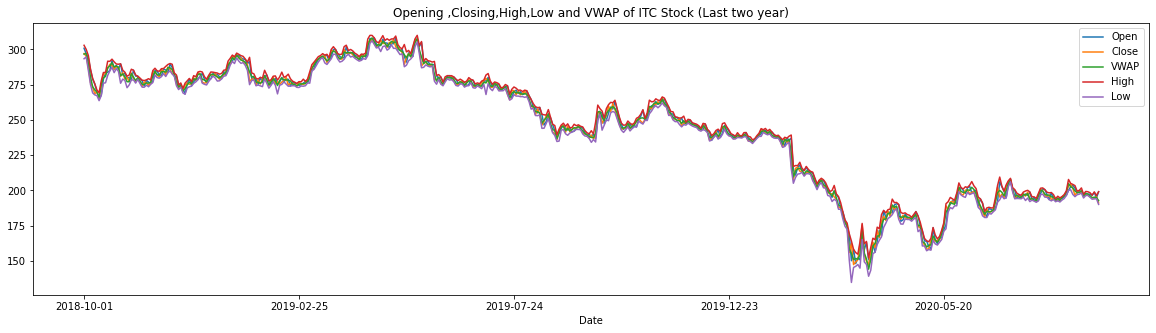

In [58]:
df1[['Open','Close','VWAP','High','Low']].plot(figsize=(20,5),title="Opening ,Closing,High,Low and VWAP of ITC Stock (Last two year)")

In [59]:
df1c=df1.reset_index()['Close']


In [60]:
df1c=np.array(df1c).reshape(-1,1)


In [61]:
df1c=scaler.fit_transform(df1c)

In [62]:
training_size1=int(len(df1c)*0.75)
test_size1=len(df1c)-training_size1
train_data1,test_data1=df1c[0:training_size1,:],df1c[training_size1:len(df1c),:1]


In [63]:
x_train1=[]
y_train1=[]
npo=10 # no of previous output
for i in range(npo,len(train_data1)):
    x_train1.append(train_data1[i-npo:i,0])
    y_train1.append(train_data1[i,0])

In [64]:
x_test1=[]
y_test1 = []
npo=10 # no of previous output
for i in range(npo,len(test_data1)):
    x_test1.append(test_data1[i-npo:i,0])
    y_test1.append(test_data1[i,0])

In [65]:
x_train1,y_train1=np.array(x_train1),np.array(y_train1)
x_train1 =np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1], 1))

In [66]:
model.fit(x_train1,y_train1,epochs=100,batch_size=128,verbose=0)

In [67]:
x_test1,y_test1=np.array(x_test1),np.array(y_test1)
x_test1.shape

(109, 10)

In [68]:
x_test1 =np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1], 1))

In [69]:
test_predict1=model.predict(x_test1)

In [70]:
test_predict1=scaler.inverse_transform(test_predict1)
test_predict1.shape

(109, 1)

In [71]:
y_test1=y_test1.reshape(-1,1)
y_test1=scaler.inverse_transform(y_test1)

In [72]:
math.sqrt(mean_squared_error(y_test1,test_predict1))

6.570149046757207

In [73]:
df1c=scaler.inverse_transform(df1c)


In [74]:
traindata1= np.empty_like(df1c)
traindata1[:, :] = np.nan
traindata1[npo:training_size1, :] = df1c[npo:training_size1, :]

In [75]:
testPredict1= np.empty_like(df1c)
testPredict1[:, :] = np.nan
testPredict1[training_size1+npo:len(df1c), :]= test_predict1

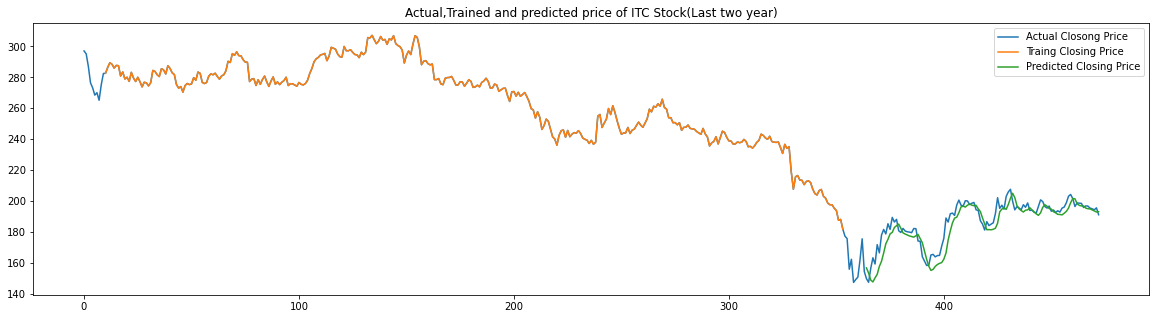

In [76]:
plt.figure(figsize=(20,5))
plt.plot(df1c,label="Actual Closong Price")
plt.plot(traindata1,label="Traing Closing Price")
plt.plot(testPredict1,label="Predicted Closing Price")
plt.title("Actual,Trained and predicted price of ITC Stock(Last two year)")
plt.legend()
plt.show()

In [77]:
df1= df1.filter(['Close'])

In [78]:
table1 = df1[training_size1+npo:]
table1.shape
table1['Predictions'] = test_predict1
table1

Close  Predictions
Date                           
2020-03-24  149.70   156.646591
2020-03-25  147.35   153.289932
2020-03-26  156.40   148.794449
2020-03-27  163.20   147.582718
2020-03-30  159.20   150.219940
...            ...          ...
2020-08-25  195.40   194.871277
2020-08-26  194.95   194.219681
2020-08-27  194.25   193.552917
2020-08-28  195.55   192.835434
2020-08-31  191.10   193.081528

[109 rows x 2 columns]

<AxesSubplot:title={'center':'Actual and Predicted price of ITC Stock(Last two year)'}, xlabel='Date'>

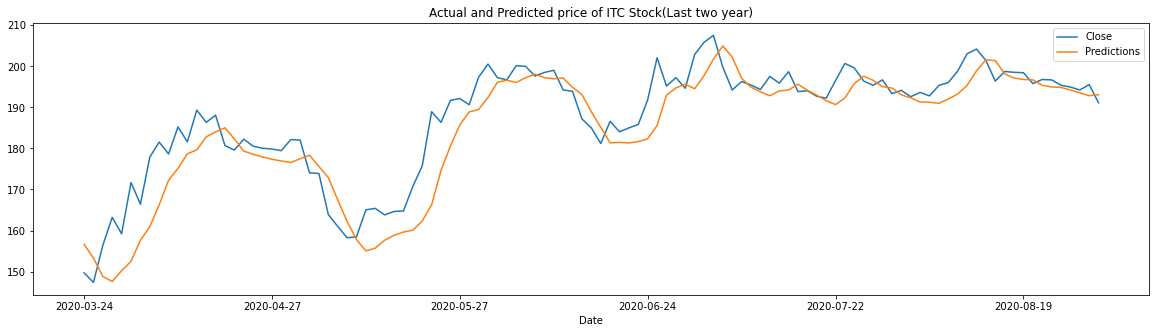

In [79]:
table1[['Close','Predictions']].plot(figsize=(20,5),title="Actual and Predicted price of ITC Stock(Last two year)")